In [1]:
# audio libraries
import librosa
import librosa.display as lplt
import IPython

# import matplotlib to be able to display graphs
import matplotlib.pyplot as plt

# transform .wav into .csv
import csv
import os
import numpy as np
import pandas as pd

import json

In [2]:
# get current working directory
cwd = os.getcwd()
print(cwd)

C:\Users\puter\Desktop\msds434_project


# Convert a single sound file for use with Spencer Puterbaugh's MSDS 434 Project

In [3]:
# establish the sound of interest
# will need to change to where your test sound is located locally
test_sound = cwd + '\\test_sounds\\413377__mbari-mars__gray-whale.wav'
print(test_sound)

C:\Users\puter\Desktop\msds434_project\test_sounds\413377__mbari-mars__gray-whale.wav


In [4]:
# load the sound file with librosa library for processing
data, sr = librosa.load(test_sound)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


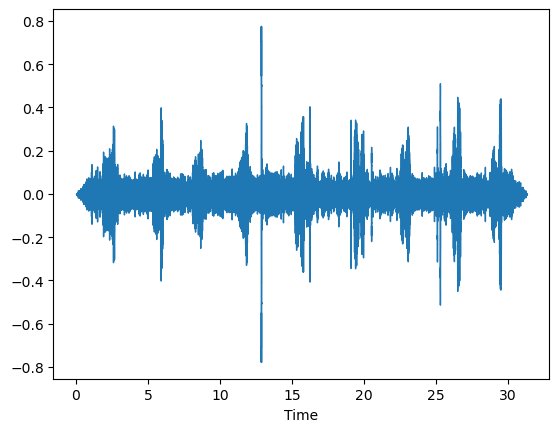

In [5]:
# display waveform image of the sound
plt.show(librosa.display.waveshow(data))

C:\Users\puter\AppData\Local\Temp\ipykernel_185016\4248495562.py:2: FutureWarning: Pass y=[0.00999836 0.00999976 0.0100013  ... 0.00995761 0.00996262 0.01      ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.01, sr = sr)[0]


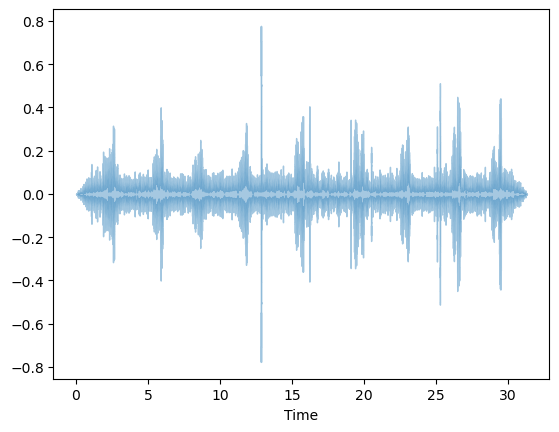

In [6]:
# display waveform with spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(data + 0.01, sr = sr)[0]
plt.show(librosa.display.waveshow(data, sr = sr, alpha = 0.4))

### Write converted sound file data to a .csv file

In [7]:
# establish the headers for the csv file
header = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean \
        perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var".split()

In [8]:
# create csv file
csv_file = open("sound_data.csv", "w", newline = "")
with csv_file:
    writer = csv.writer(csv_file)
    # write headers to first row of csv file
    writer.writerow(header)

In [9]:
# extract features from sound file and write to csv file
sound_csv = test_sound
soundfile_csv = os.path.split(test_sound)[1]

#extract features of interest using librosa
y, sr = librosa.load(sound_csv, mono = True, duration = 30)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
rmse = librosa.feature.rms(y = y)
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)

#list of features to match headers
to_append_csv = f'{soundfile_csv} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

for item in mfcc:
    to_append_csv += f' {np.mean(item)}'

csv_file = open('sound_data.csv', 'a', newline = '')

#write sound file features to file
with csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(to_append_csv.split())

In [10]:
# read data from sound_data csv file to show it wrote the data as expected
df = pd.read_csv('sound_data.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var
0,413377__mbari-mars__gray-whale.wav,0.542301,0.043998,195.947748,106.255618,324.356372,0.015661,-455.508026,99.904182,90.592743,...,-20.175755,-19.682768,-16.025536,-10.46584,-4.355811,1.072848,4.883415,6.547306,5.982173,3.514453


## Write sound file features to a json file

In [11]:
# create empty dataframe with column names being the header from earlier in the notebook
# column names will serve as keys in json later
json_df = pd.DataFrame(columns=header)
print(json_df)

Empty DataFrame
Columns: [filename, length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var, spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean, rolloff_var, zero_crossing_rate_mean, zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo, mfcc1_mean, mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var]
Index: []

[0 rows x 27 columns]


In [12]:
# extract features from sound file
sound_json = test_sound
soundfile_json = os.path.split(test_sound)[1]

#extract features of interest using librosa
y, sr = librosa.load(sound_json, mono = True, duration = 30)
chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
rmse = librosa.feature.rms(y = y)
spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y = y, sr = sr)

#list of features to match headers
to_append_json = f'{soundfile_json} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

for item in mfcc:
    to_append_json += f' {np.mean(item)}'

print(to_append_json)

413377__mbari-mars__gray-whale.wav 0.542300820350647 0.043997589498758316 195.94774794351537 106.25561842538912 324.35637199472717 0.015660903033088234 -455.5080261230469 99.90418243408203 90.59274291992188 76.26758575439453 58.54281234741211 39.35333251953125 20.6915340423584 4.344691276550293 -8.32799243927002 -16.5473690032959 -20.17575454711914 -19.682767868041992 -16.025535583496094 -10.465840339660645 -4.35581111907959 1.0728483200073242 4.8834147453308105 6.547306060791016 5.982172966003418 3.5144526958465576


In [13]:
# split to_append_json into list of individual values
to_append_json = to_append_json.split()

In [14]:
#zip headers (keys) and to_append_json (values) into dictionary
json_dict = dict(zip(header, to_append_json))

In [15]:
# convert to json string
sound_json = json.dumps(json_dict)
print(sound_json)

{"filename": "413377__mbari-mars__gray-whale.wav", "length": "0.542300820350647", "chroma_stft_mean": "0.043997589498758316", "chroma_stft_var": "195.94774794351537", "rms_mean": "106.25561842538912", "rms_var": "324.35637199472717", "spectral_centroid_mean": "0.015660903033088234", "spectral_centroid_var": "-455.5080261230469", "spectral_bandwidth_mean": "99.90418243408203", "spectral_bandwidth_var": "90.59274291992188", "rolloff_mean": "76.26758575439453", "rolloff_var": "58.54281234741211", "zero_crossing_rate_mean": "39.35333251953125", "zero_crossing_rate_var": "20.6915340423584", "harmony_mean": "4.344691276550293", "harmony_var": "-8.32799243927002", "perceptr_mean": "-16.5473690032959", "perceptr_var": "-20.17575454711914", "tempo": "-19.682767868041992", "mfcc1_mean": "-16.025535583496094", "mfcc1_var": "-10.465840339660645", "mfcc2_mean": "-4.35581111907959", "mfcc2_var": "1.0728483200073242", "mfcc3_mean": "4.8834147453308105", "mfcc3_var": "6.547306060791016", "mfcc4_mean":

In [16]:
# create json file and write sound_json to the file
with open("sound_data_json.json", "w") as json_file:
    json_file.write(sound_json)
    
json_file.close()

In [17]:
# read from created file to show it wrote correctly
read_json = open('sound_data_json.json')
  
# load to dictionary and display
json_data = json.load(read_json)
print(json_data)

read_json.close()

{'filename': '413377__mbari-mars__gray-whale.wav', 'length': '0.542300820350647', 'chroma_stft_mean': '0.043997589498758316', 'chroma_stft_var': '195.94774794351537', 'rms_mean': '106.25561842538912', 'rms_var': '324.35637199472717', 'spectral_centroid_mean': '0.015660903033088234', 'spectral_centroid_var': '-455.5080261230469', 'spectral_bandwidth_mean': '99.90418243408203', 'spectral_bandwidth_var': '90.59274291992188', 'rolloff_mean': '76.26758575439453', 'rolloff_var': '58.54281234741211', 'zero_crossing_rate_mean': '39.35333251953125', 'zero_crossing_rate_var': '20.6915340423584', 'harmony_mean': '4.344691276550293', 'harmony_var': '-8.32799243927002', 'perceptr_mean': '-16.5473690032959', 'perceptr_var': '-20.17575454711914', 'tempo': '-19.682767868041992', 'mfcc1_mean': '-16.025535583496094', 'mfcc1_var': '-10.465840339660645', 'mfcc2_mean': '-4.35581111907959', 'mfcc2_var': '1.0728483200073242', 'mfcc3_mean': '4.8834147453308105', 'mfcc3_var': '6.547306060791016', 'mfcc4_mean':

## Process a directory with subdirectories of sound files

In [ ]:
# establish variable that is the directory with a number of  data files
datadir = cwd+'\\data'
print(datadir)

In [ ]:
# get a list of all subdirectories, each being a marine mammal
# will use folder names as label values later
mammal_list = os.listdir(datadir)
mammal_list

In [ ]:
# create csv file
file = open("sound_data_full.csv", "w", newline = "")
with file:
    writer = csv.writer(file)
    # write headers to first row of csv file
    writer.writerow(header)

In [ ]:
# if you have a large number of directories/subdirectories/files, this can take quite some time to complete
for mammal in mammal_list:
    testdir = os.path.join(datadir,mammal)
    for soundfile in os.listdir(testdir):
        sound = os.path.join(testdir,soundfile)
        #print(sound)
        y, sr = librosa.load(sound, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{soundfile} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'

        for e in mfcc:
            to_append += f' {np.mean(e)}'

        to_append += f' {mammal}'
        file = open('sound_data_full.csv', 'a', newline = '')

        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())